## Chapter 32: Olympic Data

In [20]:
using CSV, DataFrames, Chain, CairoMakie
CairoMakie.activate!()
Makie.inline!(true)
ENV["DATAFRAMES_ROWS"] = 10

10

In [15]:
olympics = CSV.read("../data/olympic-athletes.csv", DataFrame, missingstring = "NA")

Row,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,Int64,String,String1,Int64?,Int64?,Float64?,String,String3,String15,Int64,String7,String31,String31,String,String7?
1,1,A Dijiang,M,24,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,missing
2,2,A Lamusi,M,23,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,missing
3,3,Gunnar Nielsen Aaby,M,24,missing,missing,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,missing
4,4,Edgar Lindenau Aabye,M,34,missing,missing,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,missing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
271112,135569,Andrzej ya,M,29,179,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,missing
271113,135570,Piotr ya,M,27,176,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",missing
271114,135570,Piotr ya,M,27,176,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",missing


In [10]:
names(olympics)

15-element Vector{String}:
 "ID"
 "Name"
 "Sex"
 "Age"
 "Height"
 "Weight"
 "Team"
 "NOC"
 "Games"
 "Year"
 "Season"
 "City"
 "Sport"
 "Event"
 "Medal"

In [11]:
olympics.Event

271116-element Vector{String}:
 "Basketball Men's Basketball"
 "Judo Men's Extra-Lightweight"
 "Football Men's Football"
 "Tug-Of-War Men's Tug-Of-War"
 "Speed Skating Women's 500 metres"
 "Speed Skating Women's 1,000 metres"
 "Speed Skating Women's 500 metres"
 "Speed Skating Women's 1,000 metres"
 "Speed Skating Women's 500 metres"
 "Speed Skating Women's 1,000 metres"
 ⋮
 "Football Men's Football"
 "Rowing Men's Lightweight Coxless Fours"
 "Rowing Men's Lightweight Coxless Fours"
 "Basketball Women's Basketball"
 "Luge Mixed (Men)'s Doubles"
 "Ski Jumping Men's Large Hill, Individual"
 "Ski Jumping Men's Large Hill, Team"
 "Bobsleigh Men's Four"
 "Bobsleigh Men's Four"

### What is the total number of medals given in all Olympics in the dataset?

In [17]:
@chain olympics begin
  dropmissing(:Medal)
  nrow
end

39783

### 2. Collectively taking all Summer games, list the top 10 athletes with medals.

### 3. List the top 5 countries with medals in the Winter Olympics.

### 4. Doing a comparison bar plot of average weight of athletes in the summer and winter olympics by gender. 

Before doing that here is a simple grouped bar plot:

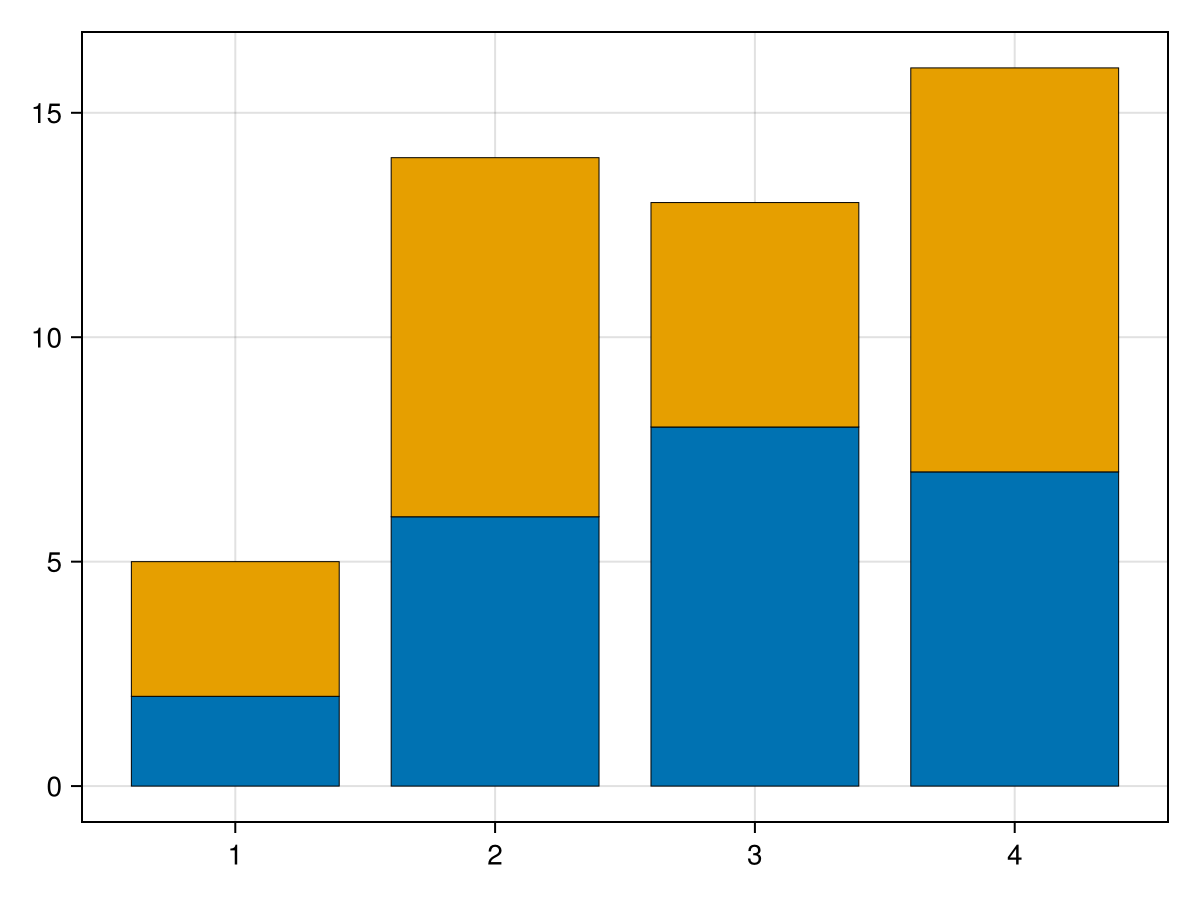

In [ ]:
h1 = [2, 6, 8, 7]
h2 = [3, 8, 5, 9]
x = [1, 2, 3, 4]
colors =Makie.wong_colors()
fig = barplot(vcat(x,x),vcat(h1,h2),
  stack = vcat(x,x),
  color=colors[repeat(1:2,inner=4)],
  strokewidth = 0.5
)

### Produce a line graph of the mean weight of athletes per games over the years.  Graph men and women with different colors

Year,weight
1992,#NA
2012,#NA
1920,#NA
1900,#NA
1994,#NA
2002,#NA
1952,#NA
1980,#NA
2000,#NA
1912,#NA


### Find the mean and standard deviation of ages of all summer athletes between 1950 and 1980.